In [5]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
model_code_dir = os.path.join(parent_dir, 'src')
if model_code_dir not in sys.path:
    sys.path.append(model_code_dir)


import exp_env as env
import matplotlib.pyplot as plt
import pickle
import copy

In [6]:
# Load the graph from the file
save_path = '../network_data/ca-GrQc.gpickle'
try:
    with open(save_path, 'rb') as f:
        G = pickle.load(f)
    print(f"Graph loaded from {save_path}")
except Exception as e:
    print(f"An error occurred while loading the graph: {e}")

Graph loaded from ../network_data/ca-GrQc.gpickle


In [7]:
graph_type = "ca-GrQc"
num_nodes = G.number_of_nodes()
influencers_cascade_steps = 3
num_influencers = 50
k_deinfluencers_ls = [0,1,2,3,4,5,6,7,8,9,10]   # Different values of k to test
general_cascade_steps = 3
num_avg_runs = 3
num_edges = G.number_of_edges()

In [8]:
model = env.run_influence_cascade(G, num_influencers=num_influencers, steps=influencers_cascade_steps, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 363
Number of deinfluenced nodes: 0
Number of susceptible nodes: 4879
influencer {1154, 17924, 25864, 23051, 14990, 16659, 4631, 24475, 25628, 4638, 2846, 17696, 12193, 2592, 20515, 7072, 4258, 13862, 19234, 18984, 11561, 4266, 13995, 6700, 45, 15664, 6707, 18684, 19641, 16953, 1341, 22980, 7882, 12492, 16083, 24280, 18649, 17240, 9441, 9314, 15457, 25447, 2664, 15209, 13036, 18677, 19575, 25852, 13310, 15999}


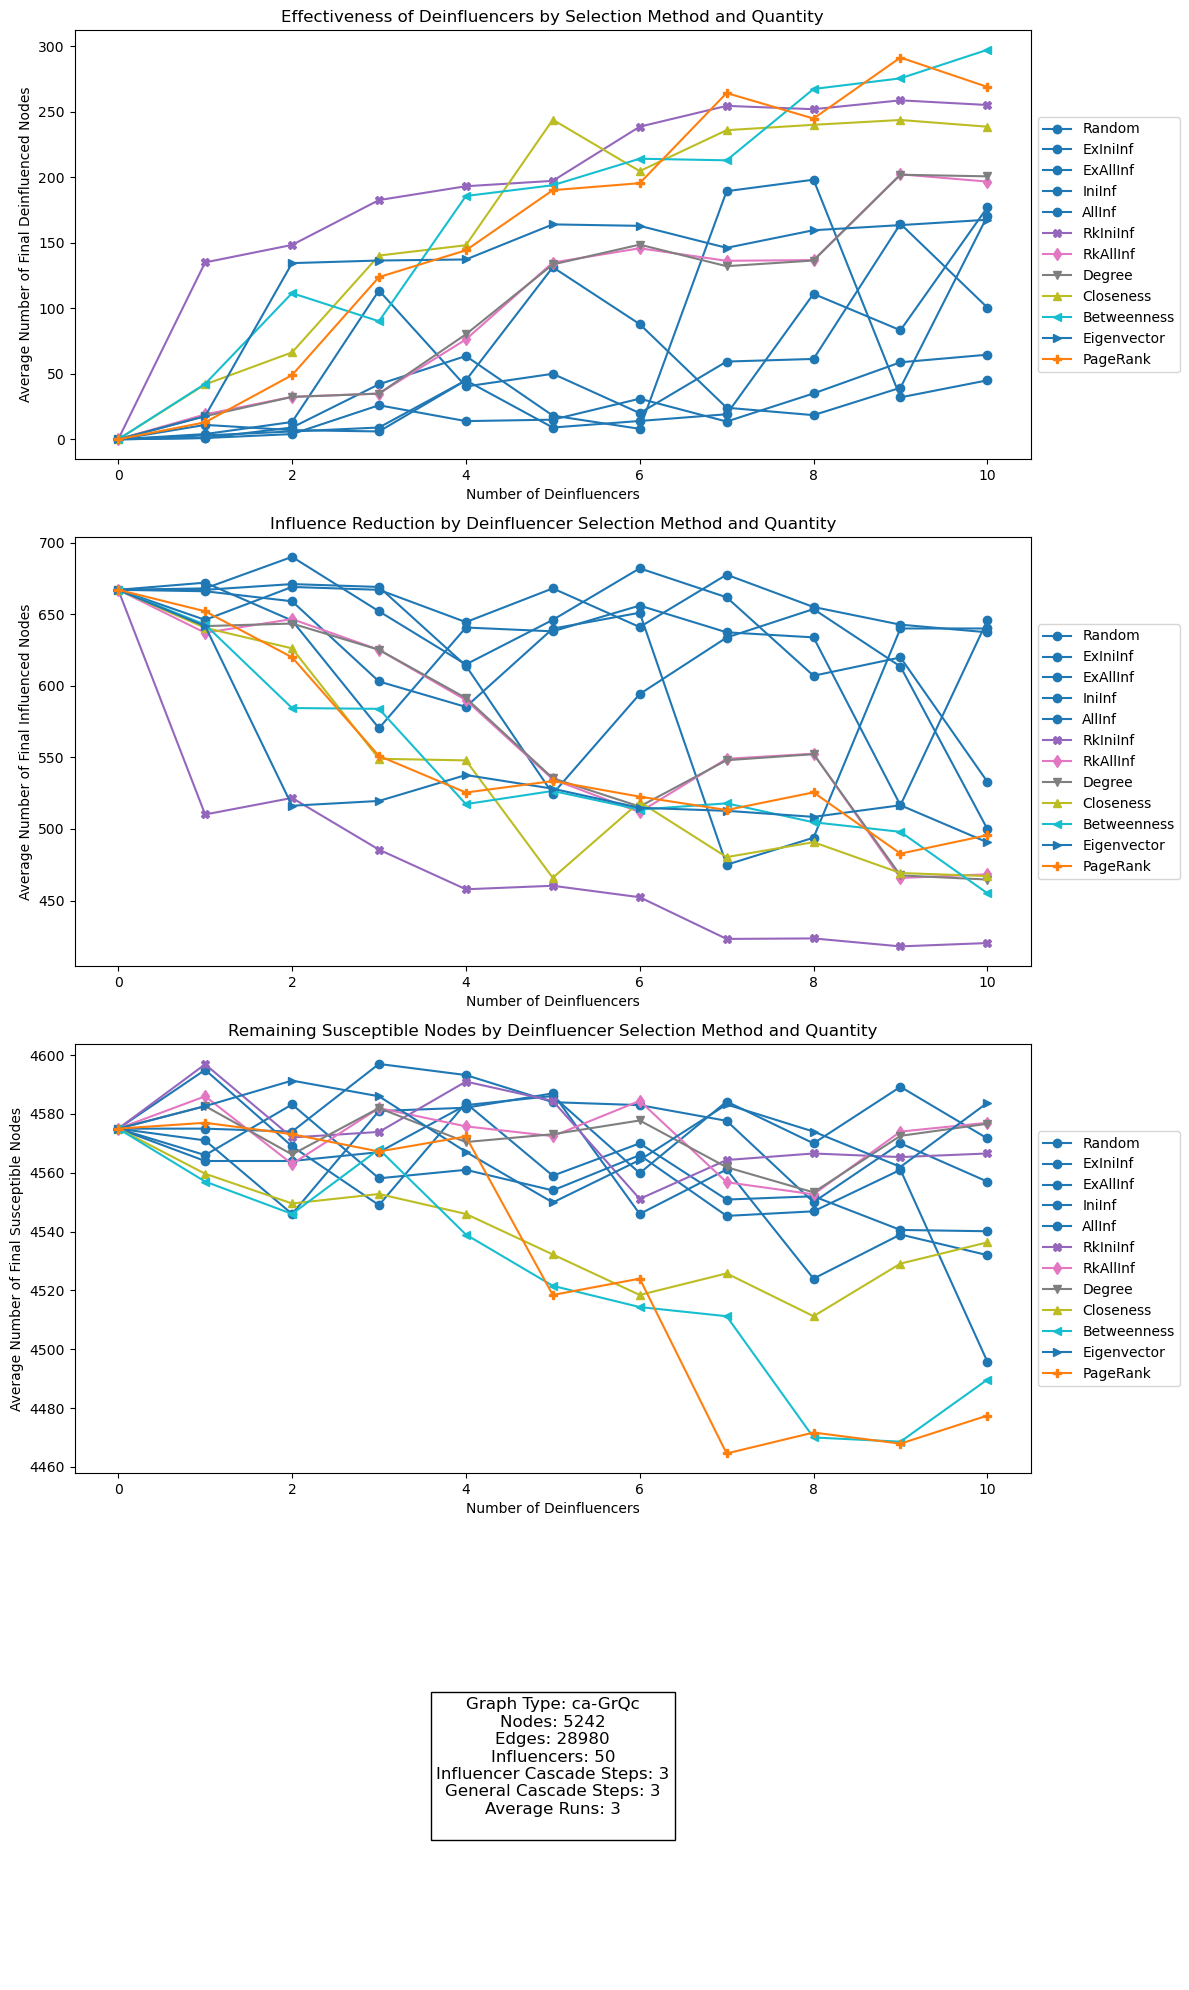

In [9]:
deinfluencers_list = env.select_deinfluencers(k_deinfluencers_ls, model_fixed_influencers)
results = env.average_results(deinfluencers_list, model_fixed_influencers, num_runs=num_avg_runs, steps=general_cascade_steps)
env.plot_deinfluencer_results_exp1(results, G, graph_type, num_nodes, num_edges, num_influencers, influencers_cascade_steps, general_cascade_steps, num_avg_runs)